# Machine Learning - FYP

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import *
from google.colab import drive, files
import xlrd

### 1) Simple Neural Networks to predict next timestep
#### b) Architecture 2  Next timestep prediction for 6 parameters using 6 inputs

Reading the file and extracting the data

In [6]:
# Reading file

drive.mount('/content/gdrive')
data = pd.read_excel('/content/gdrive/MyDrive/Colab Notebooks/dataset_updated.xlsx')

# Reading dataset and separating input features (X) and target labels (y)
X = data.iloc[:, 1:7]  # Input features
y = data.iloc[:, 8:14]   # Target labels (1 for hitting, 0 for missing)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Scaling and training dataset

In [8]:
X_numpy = X.values
y_numpy = y.values


# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform your input features
X_scaled = scaler.fit_transform(X_numpy)
y_scaled = scaler.fit_transform(y_numpy)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

Defining the model

In [27]:
model = Sequential()
model.add(Dense(6, activation='relu', input_dim = 6))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='linear'))  # Output layer with a multiple neurons

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
180/180 [==============================] - 1s 2ms/step - loss: 0.8665
Epoch 2/100
180/180 [==============================] - 0s 2ms/step - loss: 0.2774
Epoch 3/100
180/180 [==============================] - 0s 2ms/step - loss: 0.0473
Epoch 4/100
180/180 [==============================] - 0s 2ms/step - loss: 0.0129
Epoch 5/100
180/180 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 6/100
180/180 [==============================] - 1s 3ms/step - loss: 0.0052
Epoch 7/100
180/180 [==============================] - 1s 3ms/step - loss: 0.0038
Epoch 8/100
180/180 [==============================] - 1s 3ms/step - loss: 0.0029
Epoch 9/100
180/180 [==============================] - 1s 3ms/step - loss: 0.0022
Epoch 10/100
180/180 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 11/100
180/180 [==============================] - 1s 3ms/step - loss: 0.0015
Epoch 12/100
180/180 [==============================] - 1s 4ms/step - loss: 0.0013
Epoch 13/100


Evaluating model

In [28]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

# # Make predictions on the test set
# predictions = model.predict(X_test)


# #Display input values, original output values, and predicted output values
# for i in range(len(X_test)):
#     print(f"Input: {X_test[i]}, Original Output: {y_test[i]}, Predicted Output: {predictions[i]}, Error: {(y_test[i] - predictions[i])/y_test[i] }")


46/46 [==============================] - 0s 2ms/step - loss: 4.7891e-05
Mean Squared Error on Test Set: 4.7890745918266475e-05


In [29]:
# Number of future time steps to predict
num_steps = 500 # Adjust as needed
all_predictions = []


# Make predictions for the next 'num_steps' time steps sequentially
current_input = X_scaled[200]  # Start with the first test data point


for step in range(num_steps):
    # Predict the next time step
    predicted_values = model.predict(np.array([current_input]))

    # Append the predicted values to the results
    all_predictions.append(predicted_values[0])

    # Update the current input for the next prediction
    current_input = np.concatenate((predicted_values))

predicted_output = np.array((all_predictions))


# print(predicted_output)
# # # Optionally, you can save the model for future use
# # model.save('/content/gdrive/MyDrive/Colab Notebooks/my_model.h5')

1/1 [==============================] - 0s 23ms/step


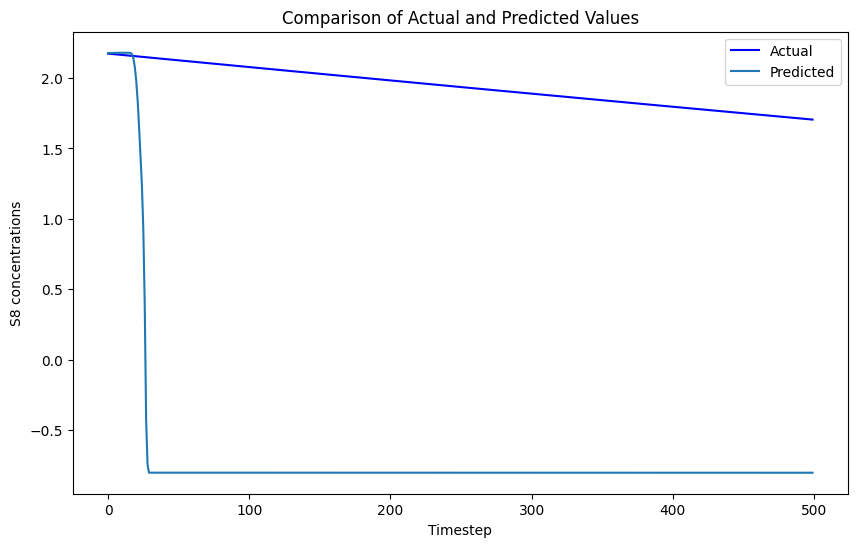

In [34]:
actual_values = X_scaled[201:201+num_steps,0]
predicted_values = predicted_output[:,0]
time = np.arange(0,(num_steps),1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, actual_values, label='Actual', c = 'b')
plt.plot(time, predicted_values, label='Predicted')

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Timestep')
plt.ylabel('S8 concentrations')
plt.legend()

# Show plot
plt.show()

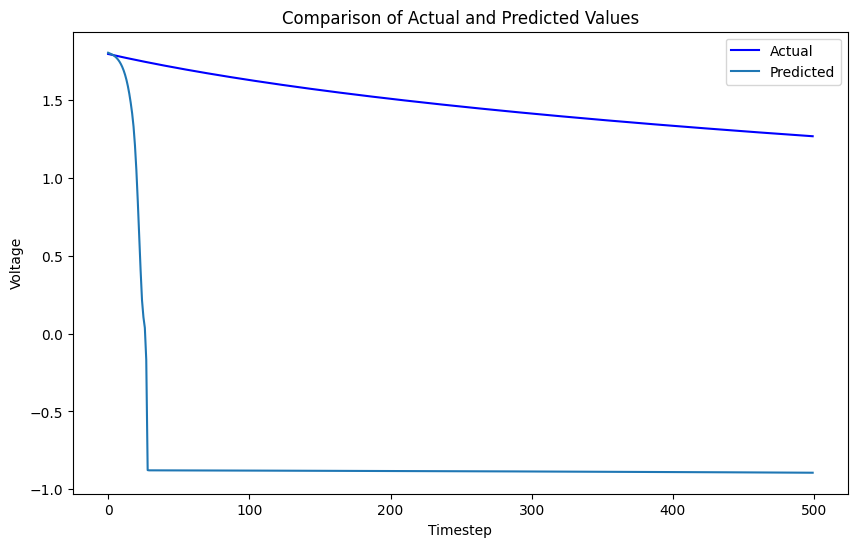

In [35]:
actual_values = X_scaled[201:201+num_steps,4]
predicted_values = predicted_output[:,4]
time = np.arange(0,(num_steps),1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, actual_values, label='Actual', c = 'b')
plt.plot(time, predicted_values, label='Predicted')

# Adding titles and labels
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Timestep')
plt.ylabel('Voltage')
plt.legend()

# Show plot
plt.show()

1/1 [==============================] - 0s 30ms/step


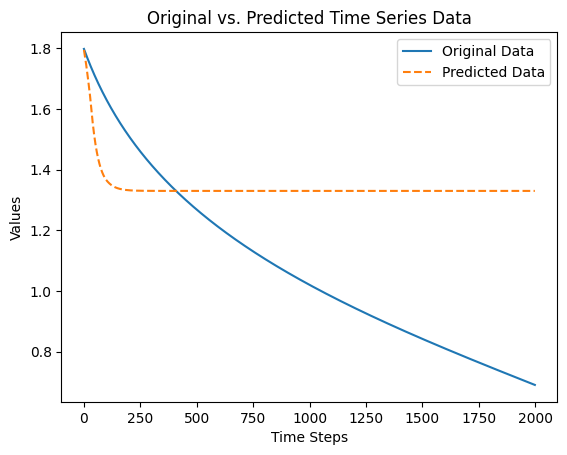

In [ ]:
# Number of future time steps to predict
num_steps = 2000 # Adjust as needed
all_predictions = []

# Make predictions for the next 'num_steps' time steps sequentially
current_input = X_scaled[200]  # Start with the last num_steps data points

# print(current_input)

for step in range(num_steps):
    # Predict the next time step
    predicted_values = model.predict(np.array([current_input]))

    # Append the predicted values to the results
    all_predictions.append(predicted_values[0])

    # Update the current input for the next prediction
    current_input = np.concatenate((predicted_values))

predicted_output = np.array(all_predictions)

# print(predicted_output)

# Extract the actual values for all columns
actual_values = X_scaled[201:200+num_steps+1,4]  # Assuming you want to plot column, adjust as needed

# Extract the predicted values for the specified column (column 2)
predicted_values = predicted_output[:, 4]

# Create a time index for plotting
time = np.arange(len(actual_values))

# Plot the original and predicted data
plt.plot(time, actual_values, label='Original Data', linestyle='-')
plt.plot(time, predicted_values, label='Predicted Data', linestyle='--')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()
plt.title('Original vs. Predicted Time Series Data')
plt.show()